In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
years = range(1900,2000)

df_res = pd.DataFrame()

for year in years:
    path = f'names\yob{year}.txt'
    df = pd.read_csv(path, names = ['name', 'gender', 'quantity'])
    df['year'] = year
    df_res = pd.concat([df_res, df])


df_name = df_res[df_res['name'].isin(['Ruth','Robert'])].groupby(['name','year']).sum()
df_name

quantity
name   year          
Robert 1900      3845
       1901      2559
       1902      3201
       1903      3057
       1904      3427
...               ...
Ruth   1995       858
       1996       801
       1997       856
       1998       850
       1999       871

[200 rows x 1 columns]

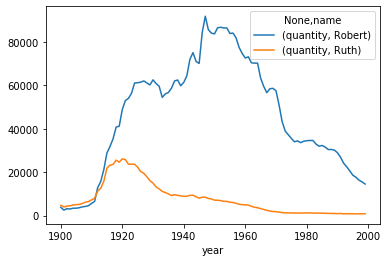

In [3]:
df_name.unstack('name').plot()

In [17]:
df_name = df_name.unstack('name')
years = [i for i in range(1900,2001)]
year5 = years[::5]

df_5 = df_name.reset_index()
df_5 = df_5[df_5['year'].isin(year5)]

df_5

year quantity       
name         Robert   Ruth
0     1900     3845   4781
5     1905     3431   5088
10    1910     5638   7247
15    1915    28854  21924
20    1920    48881  26156
25    1925    61247  22325
30    1930    62574  15010
35    1935    56755  10041
40    1940    61402   8921
45    1945    70135   8063
50    1950    83762   7138
55    1955    83937   6200
60    1960    72631   4961
65    1965    63378   3242
70    1970    57530   1828
75    1975    35579   1235
80    1980    34534   1262
85    1985    32328   1125
90    1990    28983    913
95    1995    18627    858

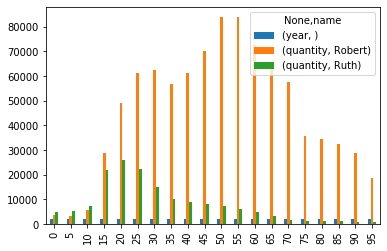

In [18]:
df_5.plot(kind='bar')

In [6]:
df_y = pd.read_csv('names\yob1950.txt', names = ['name', 'gender', 'quantity'])
df_r = df_y.loc[df_y['name'].str.contains('R')]
top = df_r.groupby('name').sum().sort_values('quantity', ascending = False).head(10)
top

,quantity
name,
Robert,83762
Richard,51096
Ronald,29982
Roger,12576
Raymond,11218
Rebecca,9444
Ruth,7138
Roy,6487
Rita,6437


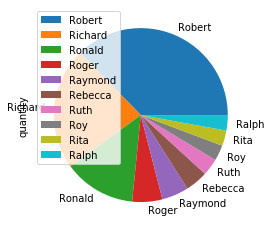

In [7]:
top.plot(kind='pie', y='quantity')

In [8]:
df_letter = df_res.groupby('name')[['quantity']].sum()
df_letter

,quantity
name,
Aadam,52
Aadil,71
Aaditya,19
Aage,7
Aagot,5
...,...
Zyron,5
Zyshaun,5
Zyshawn,16


In [9]:
def count_letter(x):
    
    # x = 'robert'
    result = 0
    vowels = "aeiouy"
    word = x.lower()
    for letter in x:
        if letter not in vowels:
            result += 1

    return result

In [10]:
df1 = df_letter.reset_index()
df1['number_letter'] = df1['name'].map(count_letter)
df1.sort_values('number_letter', ascending = False)

,name,quantity,number_letter
42017,Markchristopher,6,11
29838,Johnchristopher,103,11
11566,Christopherjohn,92,11
11569,Christophermich,45,11
30231,Jordanchristoph,5,11
...,...,...,...
53421,Ruie,406,1
13205,Cye,11,1
63213,Toua,170,1
63212,Tou,1121,1


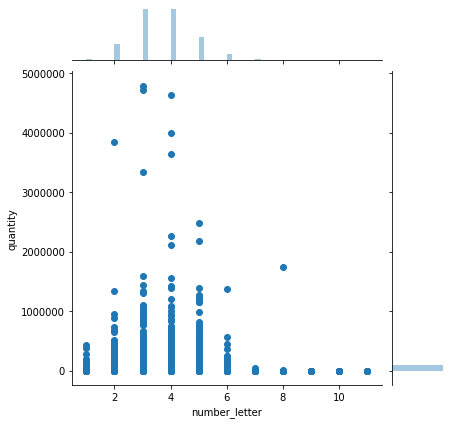

In [11]:
import seaborn as sns

sns.jointplot(x='number_letter', y='quantity', 
              data=df1, kind='scatter')